In [6]:
from copy import deepcopy
import easyDAG as ed
from easyDAG import Step, unroll, Tokens, are_equal, simplify

def plot_nx(dag):
    import networkx as nx
    G = nx.DiGraph()
    labels = {}
    for step, base, position in unroll(dag):
        func = step._function
        if isinstance(func, str):
            repr_step = func
        else:
            repr_step = func.__name__
        id_step = id(step)
        labels[id_step] = repr_step
        if base is None:
            continue
        id_base = id(base)
        G.add_edge(id_step, id_base)
    
    pos = nx.drawing.layout.planar_layout(G)
    #pos = nx.drawing.layout.spring_layout(G, pos=pos)
    nx.draw_networkx(G, labels=labels, pos=pos)


In [2]:
a1 = Step('a')
a2 = Step('a')
b = Step('b')
c = Step('c')
d = Step('d')

expr = (a1+b)/(c*(a2+b))

old_expr = deepcopy(expr)
simplify(expr)
len_old = len({id(subdag) for subdag, *_ in unroll(old_expr)})
len_new = len({id(subdag) for subdag, *_ in unroll(expr)})
print(len_old, len_new)

9 6


In [3]:
are_equal(old_expr, expr)


True

C:\Users\enrico\Miniconda3\lib\site-packages\networkx\drawing\layout.py:950: FutureWarning: arrays to stack must be passed as a "sequence" type such as list or tuple. Support for non-sequence iterables such as generators is deprecated as of NumPy 1.16 and will raise an error in the future.
  pos = np.row_stack((pos[x] for x in node_list))


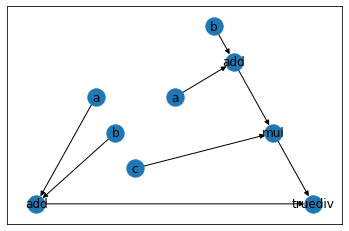

In [4]:
plot_nx(old_expr)

C:\Users\enrico\Miniconda3\lib\site-packages\networkx\drawing\layout.py:950: FutureWarning: arrays to stack must be passed as a "sequence" type such as list or tuple. Support for non-sequence iterables such as generators is deprecated as of NumPy 1.16 and will raise an error in the future.
  pos = np.row_stack((pos[x] for x in node_list))


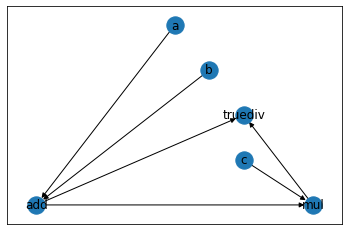

In [5]:
plot_nx(expr)

In [21]:
def generate(name_a, name_b, name_c):
    a = Step(name_a)
    b = Step(name_b)
    c = Step(name_c)
    return a*(b/c)

def Sum(*args):
    return sum(args)

dags = [generate('a{}'.format(i), 'b', 'c') for i in range(10)]
old_expr = Step(Sum, *dags)

C:\Users\enrico\Miniconda3\lib\site-packages\networkx\drawing\layout.py:950: FutureWarning: arrays to stack must be passed as a "sequence" type such as list or tuple. Support for non-sequence iterables such as generators is deprecated as of NumPy 1.16 and will raise an error in the future.
  pos = np.row_stack((pos[x] for x in node_list))


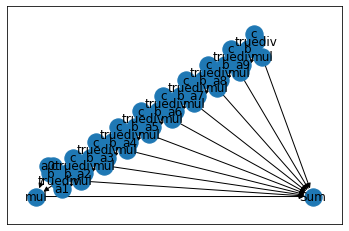

In [22]:
plot_nx(old_expr)

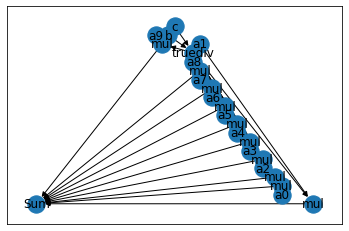

In [23]:
new_expr = simplify(deepcopy(old_expr))
plot_nx(new_expr)

In [27]:
len_old = len({id(subdag) for subdag, *_ in unroll(old_expr)})
len_new = len({id(subdag) for subdag, *_ in unroll(new_expr)})
print("num. of operations in basic dag:", len_old)
print("num. of operations in simplified dag:", len_new)

num. of operations in basic dag: 51
num. of operations in simplified dag: 24


In [28]:
ed.are_equal(old_expr, new_expr)

True